# Multi-Class Classification - Different Approaches

### Load libraries

In [1]:
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer # For treating missing values
from sklearn.metrics import r2_score, mean_squared_error # For comparing among models
from sklearn.ensemble import RandomForestClassifier # For selecting features
from sklearn.model_selection import GridSearchCV # For selecting the best model
from sklearn.model_selection import train_test_split # For spliting train/test
from sklearn.preprocessing import MinMaxScaler # For min max normalization
plt.style.use('seaborn') #set same style for all plots
import time #Calculate time processing for each model
pd.options.mode.chained_assignment = None  # suppress chained assignment warning

### Data Exploratory & Data Cleaning

In [2]:
data = pd.read_csv("cardiac_arrhythmia.csv")
data.head(10)

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_Amp_Q,V6_Amp_R,V6_Amp_S,V6_Amp_R',V6_Amp_S',V6_Amp_P,V6_Amp_T,V6_QRSA,V6_QRSTA,cardiac_arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0,0.8,0.9,20.1,25.1,10


In [3]:
data.describe()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_Amp_Q,V6_Amp_R,V6_Amp_S,V6_Amp_R',V6_Amp_S',V6_Amp_P,V6_Amp_T,V6_QRSA,V6_QRSTA,cardiac_arrhythmia
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [4]:
data['cardiac_arrhythmia'].value_counts().sort_values()

8       2
7       3
14      4
15      5
9       9
5      13
4      15
3      15
16     22
6      25
2      44
10     50
1     245
Name: cardiac_arrhythmia, dtype: int64

In [5]:
data = data.replace('?', np.NaN)
data.isnull().sum().sort_values(ascending = False)

J                     376
P                      22
T                       8
Heart_Rate              1
QRST                    1
cardiac_arrhythmia      0
V1_S'_wave              0
V1_Intrinsic_def        0
V1_Ragged_R             0
V1_DD_R                 0
V1_Ragged_P             0
V1_S_wave               0
V1_DD_P                 0
V1_Ragged_T             0
V1_DD_T                 0
V2_Q_wave               0
V2_R_wave               0
V2_S_wave               0
V2_R'_wave              0
V2_S'_wave              0
V1_R'_wave              0
AVF_DD_T                0
V1_R_wave               0
V1_Q_wave               0
V2_Ragged_R             0
AVF_Ragged_T            0
AVF_DD_P                0
AVF_Ragged_P            0
AVF_DD_R                0
AVF_Ragged_R            0
                     ... 
AVR_Amp_T               0
AVR_QRSA                0
AVR_QRSTA               0
AVL_Amp_JJ              0
AVL_Amp_R               0
DII_Amp_T               0
AVL_Amp_S               0
AVL_Amp_R'  

At first glance, the data have 452 observations and 280 variables. 
More than 50% of the observations have negative diagnosis (cardiac_arrhythmia = 1)
Among the predictor variables, QRST & Heart_Rate have 1 missing values, T has 8, P has 22, and J has 376 out of 452 observations. Since more than 75% of J are missing, we'll drop this variable from the data set.

##### Drop or Impute Missing Values?

In [6]:
data['cardiac_arrhythmia'][data['T'].isna() == True]

66      2
91      4
200     2
212     2
238     1
360     2
372     2
412    16
Name: cardiac_arrhythmia, dtype: int64

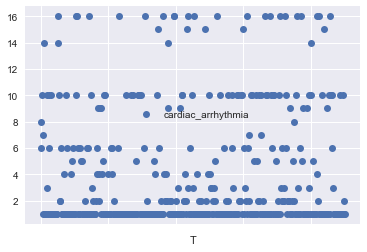

In [7]:
data.plot(x='T', y = 'cardiac_arrhythmia',  style = 'o')

We cannot drop observations with missing T's because the outcome variable contains positive diagnosis.
Since there's no linear relationship between T and the outcome, replace missing T's with the mean value.

In [8]:
data['cardiac_arrhythmia'][data['P'].isna() == True]

54     16
59      1
106     6
108     2
116    16
133     1
174    15
177     1
193     2
204     3
217    15
219    16
243    15
253     3
279     1
284    10
298    10
300    15
308     2
310     1
350     1
420    15
Name: cardiac_arrhythmia, dtype: int64

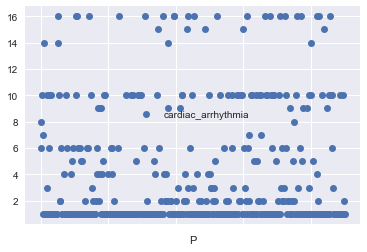

In [9]:
data.plot(x='P', y = 'cardiac_arrhythmia',  style = 'o')

Similarly, we cannot drop observations with missing P because the outcome variable contains positive diagnosis.
Since there is no linear relationship between P and the outcome, replace missing P with the mean value.

In [10]:
data['cardiac_arrhythmia'][data['Heart_Rate'].isna() == True]

4    7
Name: cardiac_arrhythmia, dtype: int64

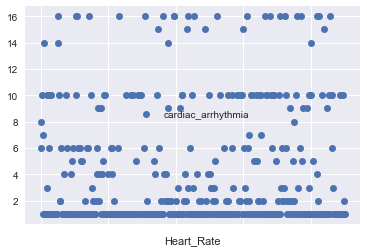

In [11]:
data.plot(x='Heart_Rate', y = 'cardiac_arrhythmia',  style = 'o')

Similarly, we cannot drop observations with missing Heart_Rate because the outcome variable contains positive diagnosis.
Since there is no linear relationship between Heart_Rate and the outcome, replace missing Heart_Rate with the mean value.

In [12]:
data['cardiac_arrhythmia'][data['QRST'].isna() == True]

241    1
Name: cardiac_arrhythmia, dtype: int64

We can drop this observation from the data set.

In [13]:
data = data.drop(data[data['QRST'].isna() == True].index)

Filling the rest of the missing values with missing data

In [14]:
z = Imputer(missing_values = np.nan, strategy = 'mean', axis = 1).fit_transform(data)
data = pd.DataFrame(data = z, columns = data.columns.values)

In [15]:
##### X's and Y

In [16]:
Y = data.cardiac_arrhythmia.values.ravel()
X_raw = data.drop(['J','cardiac_arrhythmia'], 1)

Check to see if there's any other missing data:

In [17]:
sum(X_raw.isnull().sum() > 0)

0

### Comparison Table

We will compare different algorithms using R-square, MSE, and running time. 
Additionally, since this is a healthcare problem and negative diagnosis (y=1) is much more prevalent than positive diagnosis, we'll also look at the accuracy, accuracy_positive (how the model accurately predicts each type of diagnosis when y > 1), and true_positive (how the model can predict people with any positive diagnosis).

In [18]:
results = pd.DataFrame(index=None, columns=['model','train_Rsquare', 'test_Rsquare', 'train_MSE','test_MSE', 'accuracy', 'accuracy_positive', 'true_positive', 'duration'])

Create a function to calculate the results matrix for each model

In [19]:
def result(X_train, y_train, X_test, y_test, y_test_simple, name, grid_search, duration):
    train_Rsquare = grid_search.score(X_train, y_train)
    test_Rsquare = grid_search.score(X_test, y_test)
    train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
    test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))
    accuracy = sum(y_test == grid_search.predict(X_test))/y_test.shape[0] 
    accuracy_positive = sum(y_test[np.where(y_test>1)] == grid_search.predict(X_test[np.where(y_test>1)]))/y_test[np.where(y_test>1)].shape[0]
    y_predict = grid_search.predict(X_test)
    y_predict[y_predict == 1] = 0 # normal
    y_predict[y_predict >0] = 1 # not-normal
    true_positive = sum(y_test_simple[np.where(y_test_simple>0)] == y_predict[np.where(y_test_simple>0)])/y_test[np.where(y_test_simple>0)].shape[0] 
    results = pd.Series({'model':name,'train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 
                                    'train_MSE':train_MSE,'test_MSE':test_MSE, 'accuracy': accuracy, 
                                    'accuracy_positive': accuracy_positive, 'true_positive':true_positive, 'duration': duration})
    return(results)

### Without Feature Selection

Split into train and test sets

In [20]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_raw, Y, random_state = 100)

print('Shape of train {}, shape of test {}'.format(X_train1.shape, X_test1.shape))

Shape of train (338, 278), shape of test (113, 278)


Since the data set includes both nominal (0,1) and continous variables, we can re-scale the data for quicker conversion.

In [21]:
MinMax = MinMaxScaler(feature_range= (0,1))
X_train1 = MinMax.fit_transform(X_train1)
X_test1 = MinMax.transform(X_test1)

To calculate true positive (y = 0 means normal, y = 1 means not normal)

In [22]:
y_test_simple1 = np.array(y_test1)
y_test_simple1[y_test_simple1 == 1] = 0 # normal
y_test_simple1[y_test_simple1 >0] = 1 # not-normal

##### KNN Classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
param_grid_knn1 = {'weights':['distance', 'uniform'], 'n_neighbors':range(2,100)}
grid_search_knn1 = GridSearchCV(KNeighborsClassifier(), param_grid_knn1, cv=5)
grid_search_knn1.fit(X_train1, y_train1)
duration_knn1 = time.time() - start_time
name = 'KNN Classifier All Features'   
results = results.append(result(X_train1, y_train1, X_test1, y_test1, y_test_simple1, name, grid_search_knn1,duration_knn1),ignore_index=True )  
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.0,0.663717,0.0,23.460177,0.663717,0.181818,0.227273,96.224313


##### Logistics Classification

In [24]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
param_grid_logit1 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_search_logit1 = GridSearchCV(LogisticRegression(penalty='l2'), param_grid_logit1, cv=5)
grid_search_logit1.fit(X_train1, y_train1)

duration_logit1 = time.time() - start_time
name = 'Logistic Regression All Features'
results = results.append(result(X_train1, y_train1, X_test1, y_test1, y_test_simple1, name, grid_search_logit1, duration_logit1),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.00000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.14497,15.221239,0.743363,0.500000,0.727273,3.183996


##### Linear Support Vector Machine

In [25]:
from sklearn.svm import LinearSVC
start_time = time.time()
param_grid_svc1 = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000], 'max_iter':[1000,10000] }

grid_search_svc1 = GridSearchCV(LinearSVC(random_state=0), param_grid_svc1, cv=5)
grid_search_svc1.fit(X_train1, y_train1)
duration_svc1 = time.time() - start_time
name = 'Linear SVC All Features'
results = results.append(result(X_train1, y_train1, X_test1, y_test1, y_test_simple1, name, grid_search_svc1, duration_svc1),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225


##### Kernelized Support Vector Machine

In [26]:
from sklearn.svm import SVC
start_time = time.time()
param_grid_rbf1 = {'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000], 'gamma':[0.001, 0.01, 0.1, 0.5, 1, 10]}

grid_search_rbf1 = GridSearchCV(SVC(kernel = 'rbf'), param_grid_rbf1, cv=5)
grid_search_rbf1.fit(X_train1, y_train1)
duration_rbf1 = time.time() - start_time
name = 'Linear SVC with RBF Kernel All Features'
results = results.append(result(X_train1, y_train1, X_test1, y_test1, y_test_simple1, name, grid_search_rbf1, duration_rbf1),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225
3,Linear SVC with RBF Kernel All Features,0.967456,0.734513,3.612426,18.991150,0.734513,0.500000,0.750000,33.635989


In [27]:
##### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
param_grid_tree1 = {'max_features':[None,'auto', 'log2'], 'max_depth':[5,10,15,20,50]}

grid_search_tree1 = GridSearchCV(DecisionTreeClassifier(random_state = 10), param_grid_tree1, cv=5)
grid_search_tree1.fit(X_train1, y_train1)
duration_tree1 = time.time() - start_time
name = 'Decision Tree All Features'
results = results.append(result(X_train1, y_train1, X_test1, y_test1, y_test_simple1, name, grid_search_tree1, duration_tree1),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225
3,Linear SVC with RBF Kernel All Features,0.967456,0.734513,3.612426,18.991150,0.734513,0.500000,0.750000,33.635989
4,Decision Tree All Features,0.798817,0.654867,13.192308,18.601770,0.654867,0.318182,0.659091,1.069025


In [29]:
###### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
start_time = time.time()
#Tuning ridge on new dataset
param_grid_forest1 = {"max_depth": [3, 5],
              "max_features": sp_randint(1, 40),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False]}
random_search_forest1 = RandomizedSearchCV(RandomForestClassifier(n_estimators=1000), param_distributions=param_grid_forest1,
                                   n_iter=20, random_state=0,n_jobs=-1)
random_search_forest1.fit(X_train1, y_train1)
duration_forest1 = time.time() - start_time
name = 'Random Forest All Features'
results = results.append(result(X_train1, y_train1, X_test1, y_test1, y_test_simple1, name, random_search_forest1, duration_forest1),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225
3,Linear SVC with RBF Kernel All Features,0.967456,0.734513,3.612426,18.991150,0.734513,0.500000,0.750000,33.635989
4,Decision Tree All Features,0.798817,0.654867,13.192308,18.601770,0.654867,0.318182,0.659091,1.069025
5,Random Forest All Features,0.739645,0.716814,18.002959,18.938053,0.716814,0.340909,0.454545,51.342942


### With Feature Selection

##### Feature Selection using Random Forest

Since the data set includes both nominal (0,1) and continous variables, we need to re-scale the data before running random forest for feature selection. The reason is that random forest tends to give higher weights to variables with bigger range.

In [31]:
MinMax = MinMaxScaler(feature_range= (0,1))
X_scaled = pd.DataFrame(MinMax.fit_transform(X_raw))
X_scaled.columns = X_raw.columns

In [32]:
param_grid = {'max_features':['auto', 'log2'], 'max_depth':[2,5,10,15,20,50]}
rf_reg = RandomForestClassifier(n_estimators= 500, n_jobs = -1, random_state = 10)
grid_search = GridSearchCV(rf_reg, param_grid, cv=5)
grid_search.fit(X_scaled, Y)

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'log2'], 'max_depth': [2, 5, 10, 15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
rf = grid_search.best_estimator_.fit(X_scaled, Y)
r = pd.DataFrame(data = rf.feature_importances_*1000)
dictionary = dict(zip(X_scaled.columns, rf.feature_importances_*1000))

Select independent variables in the top 15% with highest feature importances => we've reduced from 278 variables to 42 variables

In [34]:
d={k: v for k, v in dictionary.items() if v > np.percentile(r, 85)}

columns=[]
for key in d.keys():
  columns.append(key)
X=X_scaled[columns]
X.shape

(451, 42)

In [35]:
X.columns

Index(['QRS_duration', 'Q-T_interval', 'Heart_Rate', 'AVF_Q_wave', 'V1_S_wave',
       'V1_R'_wave', 'V1_Intrinsic_def', 'V3_R_wave', 'V3_S_wave',
       'V3_Intrinsic_def', 'DI_Amp_T', 'DI_QRSTA', 'DII_Amp_T', 'DII_QRSTA',
       'AVR_Amp_T', 'AVR_QRSTA', 'AVL_Amp_T', 'AVF_Amp_Q', 'AVF_Amp_T',
       'V1_Amp_R'', 'V1_Amp_P', 'V1_QRSA', 'V2_Amp_JJ', 'V2_Amp_S',
       'V2_Amp_R'', 'V2_Amp_T', 'V2_QRSA', 'V3_Amp_JJ', 'V3_Amp_Q', 'V3_Amp_R',
       'V3_Amp_S', 'V3_Amp_T', 'V3_QRSA', 'V3_QRSTA', 'V4_Amp_JJ', 'V4_Amp_T',
       'V4_QRSTA', 'V5_Amp_JJ', 'V5_Amp_T', 'V5_QRSTA', 'V6_Amp_T',
       'V6_QRSTA'],
      dtype='object')

##### Split data into train and test set

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, random_state = 100)
print('Shape of train {}, shape of test {}'.format(X_train2.shape, X_test2.shape))

Shape of train (338, 42), shape of test (113, 42)


In [37]:
MinMax = MinMaxScaler(feature_range= (0,1))
X_train2 = MinMax.fit_transform(X_train2)
X_test2 = MinMax.transform(X_test2)

##### Create a function to calculate the results matrix for each model

To calculate true_positive:

In [38]:
y_test_simple2 = np.array(y_test2)
y_test_simple2[y_test_simple2 == 1] = 0 # normal
y_test_simple2[y_test_simple2 >0] = 1 # not-normal

##### KNN Classification

In [39]:
start_time_knn2 = time.time()
param_grid_knn2 = {'weights':['distance', 'uniform'], 'n_neighbors':range(3,100)}
grid_search_knn2 = GridSearchCV(KNeighborsClassifier(), param_grid_knn2, cv=5)
grid_search_knn2.fit(X_train2, y_train2)
duration_knn2 = time.time() - start_time_knn2
name = 'KNN Classifier Top 15% Features'   
results = results.append(result(X_train2, y_train2, X_test2, y_test2, y_test_simple2, name, grid_search_knn2,duration_knn2),ignore_index=True )  
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225
3,Linear SVC with RBF Kernel All Features,0.967456,0.734513,3.612426,18.991150,0.734513,0.500000,0.750000,33.635989
4,Decision Tree All Features,0.798817,0.654867,13.192308,18.601770,0.654867,0.318182,0.659091,1.069025
5,Random Forest All Features,0.739645,0.716814,18.002959,18.938053,0.716814,0.340909,0.454545,51.342942
6,KNN Classifier Top 15% Features,1.000000,0.752212,0.000000,18.752212,0.752212,0.454545,0.613636,15.490877


##### Logistics Classification

In [40]:
start_time_logit2 = time.time()
param_grid_logit2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_search_logit2 = GridSearchCV(LogisticRegression(penalty='l2'), param_grid_logit2, cv=5)
grid_search_logit2.fit(X_train2, y_train2)

duration_logit2 = time.time() - start_time_logit2
name = 'Logistic Regression Top 15% Features'
results = results.append(result(X_train2, y_train2, X_test2, y_test2, y_test_simple2, name, grid_search_logit2, duration_logit2),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225
3,Linear SVC with RBF Kernel All Features,0.967456,0.734513,3.612426,18.991150,0.734513,0.500000,0.750000,33.635989
4,Decision Tree All Features,0.798817,0.654867,13.192308,18.601770,0.654867,0.318182,0.659091,1.069025
5,Random Forest All Features,0.739645,0.716814,18.002959,18.938053,0.716814,0.340909,0.454545,51.342942
6,KNN Classifier Top 15% Features,1.000000,0.752212,0.000000,18.752212,0.752212,0.454545,0.613636,15.490877
7,Logistic Regression Top 15% Features,0.760355,0.752212,15.757396,18.566372,0.752212,0.454545,0.613636,0.715414


##### Linear Support Vector Machine

In [41]:
start_time_svc2 = time.time()
param_grid_svc2 = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000], 'max_iter':[1000,10000] }

grid_search_svc2 = GridSearchCV(LinearSVC(random_state=0), param_grid_svc2, cv=5)
grid_search_svc2.fit(X_train2, y_train2)
duration_svc2 = time.time() - start_time_svc2
name = 'Linear SVC Top 15% Features'
results = results.append(result(X_train2, y_train2, X_test2, y_test2, y_test_simple2, name, grid_search_svc2, duration_svc2),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225
3,Linear SVC with RBF Kernel All Features,0.967456,0.734513,3.612426,18.991150,0.734513,0.500000,0.750000,33.635989
4,Decision Tree All Features,0.798817,0.654867,13.192308,18.601770,0.654867,0.318182,0.659091,1.069025
5,Random Forest All Features,0.739645,0.716814,18.002959,18.938053,0.716814,0.340909,0.454545,51.342942
6,KNN Classifier Top 15% Features,1.000000,0.752212,0.000000,18.752212,0.752212,0.454545,0.613636,15.490877
7,Logistic Regression Top 15% Features,0.760355,0.752212,15.757396,18.566372,0.752212,0.454545,0.613636,0.715414
8,Linear SVC Top 15% Features,0.813609,0.752212,11.292899,13.840708,0.752212,0.545455,0.795455,20.257206


###### Kernelized Support Vector Machine

In [42]:
start_time_rbf2 = time.time()
param_grid_rbf2 = {'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000], 'gamma':[0.001, 0.01, 0.1, 0.5, 1, 10]}

grid_search_rbf2 = GridSearchCV(SVC(kernel = 'rbf'), param_grid_rbf2, cv=5)
grid_search_rbf2.fit(X_train2, y_train2)
duration_rbf2 = time.time() - start_time_rbf2
name = 'Linear SVC with RBF Kernel Top 15% Features'
results = results.append(result(X_train2, y_train2, X_test2, y_test2, y_test_simple2, name, grid_search_rbf2, duration_rbf2),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225
3,Linear SVC with RBF Kernel All Features,0.967456,0.734513,3.612426,18.991150,0.734513,0.500000,0.750000,33.635989
4,Decision Tree All Features,0.798817,0.654867,13.192308,18.601770,0.654867,0.318182,0.659091,1.069025
5,Random Forest All Features,0.739645,0.716814,18.002959,18.938053,0.716814,0.340909,0.454545,51.342942
6,KNN Classifier Top 15% Features,1.000000,0.752212,0.000000,18.752212,0.752212,0.454545,0.613636,15.490877
7,Logistic Regression Top 15% Features,0.760355,0.752212,15.757396,18.566372,0.752212,0.454545,0.613636,0.715414
8,Linear SVC Top 15% Features,0.813609,0.752212,11.292899,13.840708,0.752212,0.545455,0.795455,20.257206
9,Linear SVC with RBF Kernel Top 15% Features,0.914201,0.823009,7.505917,16.176991,0.823009,0.636364,0.795455,6.158037


##### Decision Tree

In [43]:
start_time_tree2 = time.time()
param_grid_tree2 = {'max_features':[None,'auto', 'log2'], 'max_depth':[5,10,15,20,50]}

grid_search_tree2 = GridSearchCV(DecisionTreeClassifier(random_state = 10), param_grid_tree2, cv=5)
grid_search_tree2.fit(X_train2, y_train2)
duration_tree2 = time.time() - start_time_tree2
name = 'Decision Tree Top 15% Features'
results = results.append(result(X_train2, y_train2, X_test2, y_test2, y_test_simple2, name, grid_search_tree2, duration_tree2),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225
3,Linear SVC with RBF Kernel All Features,0.967456,0.734513,3.612426,18.991150,0.734513,0.500000,0.750000,33.635989
4,Decision Tree All Features,0.798817,0.654867,13.192308,18.601770,0.654867,0.318182,0.659091,1.069025
5,Random Forest All Features,0.739645,0.716814,18.002959,18.938053,0.716814,0.340909,0.454545,51.342942
6,KNN Classifier Top 15% Features,1.000000,0.752212,0.000000,18.752212,0.752212,0.454545,0.613636,15.490877
7,Logistic Regression Top 15% Features,0.760355,0.752212,15.757396,18.566372,0.752212,0.454545,0.613636,0.715414
8,Linear SVC Top 15% Features,0.813609,0.752212,11.292899,13.840708,0.752212,0.545455,0.795455,20.257206
9,Linear SVC with RBF Kernel Top 15% Features,0.914201,0.823009,7.505917,16.176991,0.823009,0.636364,0.795455,6.158037


##### Random Forest

In [44]:
start_time_forest2 = time.time()
#Tuning ridge on new dataset
param_grid_forest2 = {"max_depth": [3, 5],
              "max_features": sp_randint(1, 40),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False]}
random_search_forest2 = RandomizedSearchCV(RandomForestClassifier(n_estimators=1000), param_distributions=param_grid_forest2,
                                   n_iter=20, random_state=0,n_jobs=-1)
random_search_forest2.fit(X_train2, y_train2)
duration_forest2 = time.time() - start_time_forest2
name = 'Random Forest Top 15% Features'
results = results.append(result(X_train2, y_train2, X_test2, y_test2, y_test_simple2, name, random_search_forest2, duration_forest2),ignore_index=True ) 
results

C:\Users\thaoduong252\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE,accuracy,accuracy_positive,true_positive,duration
0,KNN Classifier All Features,1.000000,0.663717,0.000000,23.460177,0.663717,0.181818,0.227273,96.224313
1,Logistic Regression All Features,0.926036,0.743363,6.144970,15.221239,0.743363,0.500000,0.727273,3.183996
2,Linear SVC All Features,0.899408,0.752212,6.887574,13.159292,0.752212,0.500000,0.727273,52.810225
3,Linear SVC with RBF Kernel All Features,0.967456,0.734513,3.612426,18.991150,0.734513,0.500000,0.750000,33.635989
4,Decision Tree All Features,0.798817,0.654867,13.192308,18.601770,0.654867,0.318182,0.659091,1.069025
5,Random Forest All Features,0.739645,0.716814,18.002959,18.938053,0.716814,0.340909,0.454545,51.342942
6,KNN Classifier Top 15% Features,1.000000,0.752212,0.000000,18.752212,0.752212,0.454545,0.613636,15.490877
7,Logistic Regression Top 15% Features,0.760355,0.752212,15.757396,18.566372,0.752212,0.454545,0.613636,0.715414
8,Linear SVC Top 15% Features,0.813609,0.752212,11.292899,13.840708,0.752212,0.545455,0.795455,20.257206
9,Linear SVC with RBF Kernel Top 15% Features,0.914201,0.823009,7.505917,16.176991,0.823009,0.636364,0.795455,6.158037


# Conclusion
1. Features Selection helps reduce running time
2. Models with Feature Selection perform better than those with all features
3. Decision Tree Top 15% Features has highest true_positive and takes least amount of time to run. SVC with RBF Kernel Top 15% Features has highest accuracy and accuracy positive.
=> If you want to have a good diagnosis whethere one is normal or has ANY of the cardiac arrhythmia, you should use Decision Tree.
=> If you want to have the best diagnosis of one's cardiac arrhythmia case, you should use Linear SVC with RBF Kernel.